## 1 Lab 3.6 from ISLR

### 1.1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
boston = pd.read_csv('boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
lm = sm.OLS.from_formula('medv ~ lstat', boston)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        23:10:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
result.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [5]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])
preds = result.get_prediction(new)
preds.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lstat', ylabel='medv'>

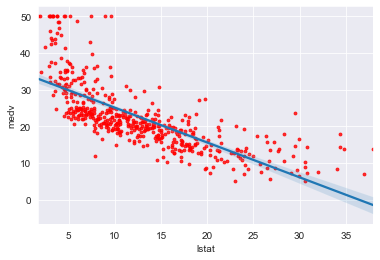

In [6]:
sns.regplot(boston.lstat, boston.medv, scatter_kws={'color':'r', 's':8})

In [7]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")

In [8]:
#add np.square(lstat) as a variable
lm2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', boston)
result2 = lm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.56e-112
Time:                        23:10:14   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
result2.conf_int()

,0,1
Intercept,41.148631,44.575384
lstat,-2.576056,-2.089586
np.square(lstat),0.036189,0.050905


In [10]:
fitted_values2=pd.Series(result2.fittedvalues, name="Fitted Values2")
residuals2=pd.Series(result2.resid, name='Residuals2')

C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


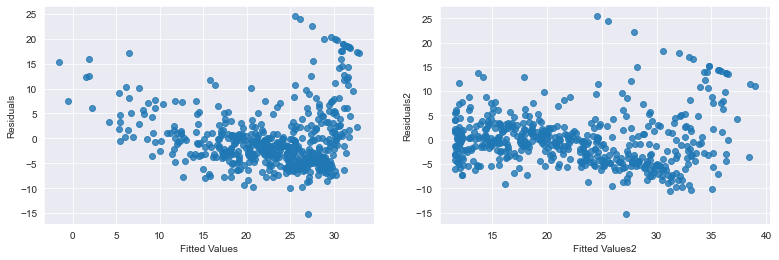

In [11]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.regplot(fitted_values,residuals,fit_reg=False)

plt.subplot(1,2,2)
sns.regplot(fitted_values2,residuals2,fit_reg=False)

plt.show()

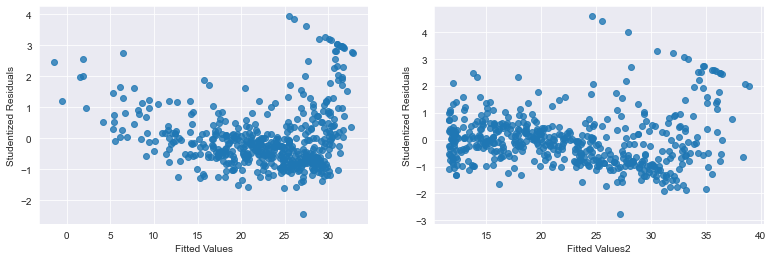

In [12]:
studentized_residuals = pd.Series(result.resid_pearson, name="Studentized Residuals")
studentized_residuals2 = pd.Series(result2.resid_pearson, name="Studentized Residuals")
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.regplot(fitted_values,studentized_residuals,fit_reg=False)

plt.subplot(1,2,2)
sns.regplot(fitted_values2,studentized_residuals2,fit_reg=False)

plt.show()


<b>difference between two regression:</b>
<p>The residuals of regression using only lstat as a predictor exhibit a clear U-shape, which provides a strong indication of non-linearity in the data.
<p>In contrast, There appears to be little pattern in the residuals of regression using lstat and np.square(lstat) as predictors, suggesting that the quadratic term improves the fit to the data.

<AxesSubplot:xlabel='Leverage', ylabel='Studentized Residuals'>

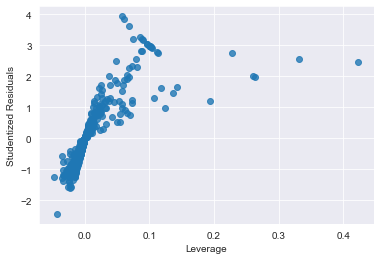

In [13]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, studentized_residuals,  fit_reg=False)

In [14]:
result = sm.OLS.from_formula('medv ~ lstat + age', boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.98e-88
Time:                        23:10:16   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
result = sm.OLS(boston.medv, boston.drop('medv', axis=1)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:10:16   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
zn             0.0487      0.014      3.382      0.001       0.020       0.077
indus         -0.0041      0.064     -0.063      0.950      -0.131       0.123
chas           2.8540      0.904      3.157      0.002       1.078       4.630
nox           -2.8684      3.359     -0.854      0.394      -9.468       3.731
rm             5.9281      0.309     19.178      0.000       5.321       6.535
age           -0.0073      0.014     -0.526      0.599      -0.034       0.020
dis           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
rad            0.1712      0.067      2.564      0.011       0.040       0.302
tax           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
ptratio       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
black          0.0149      0.003      5.528      0.000       0.010       0.020
lstat         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
result = sm.OLS(boston.medv, boston.drop(['medv', 'age'], axis=1)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:10:16   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3123.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0929      0.034     -2.700      0.007      -0.160      -0.025
zn             0.0496      0.014      3.476      0.001       0.022       0.078
indus         -0.0043      0.064     -0.066      0.947      -0.131       0.122
chas           2.8308      0.902      3.138      0.002       1.058       4.603
nox           -3.3322      3.239     -1.029      0.304      -9.695       3.031
rm             5.8941      0.302     19.514      0.000       5.301       6.488
dis           -0.9330      0.183     -5.085      0.000      -1.293      -0.572
rad            0.1731      0.067      2.598      0.010       0.042       0.304
tax           -0.0094      0.004     -2.408      0.016      -0.017      -0.002
ptratio       -0.3942      0.110     -3.593      0.000      -0.610      -0.179
black          0.0148      0.003      5.515      0.000       0.010       0.020
lstat         -0.4252      0.048     -8.883      0.000      -0.519      -0.331
==============================================================================
Omnibus:                      200.402   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.159
Skew:                           1.584   Prob(JB):                    7.10e-286
Kurtosis:                      10.228   Cond. No.                     8.14e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
sm.OLS.from_formula('medv ~ lstat*age', boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           4.86e-88
Time:                        23:10:16   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', boston).fit()
lm.fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.56e-112
Time:                        23:10:16   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
lm.fit = sm.OLS.from_formula('medv ~ lstat', boston).fit()
sm.stats.anova_lm(lm.fit, lm.fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

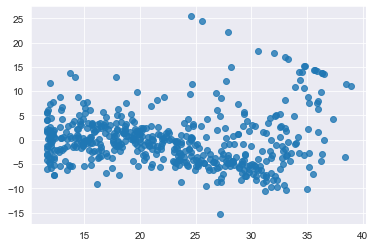

In [20]:
sns.regplot(lm.fit2.fittedvalues, lm.fit2.resid, fit_reg=False)

### 1.2 

<b>The result is different from the regression of ISLR</b><br>
The reason is that the poly() function of R orthogonalizes the predictors: this means that the features output by this function are not simply a sequence of powers of the argument. But using PolynomialFeatures() get simply a sequence of power.<br> But the two methods have the same fitted values as a linear model applied to the raw polynomials (although the coefficient estimates, standard errors, and p-values will differ).
  
    

In [21]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
x = boston.lstat.values.reshape(-1,1)
xp = polynomial_features.fit_transform(x)
sm.OLS(boston.medv, xp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          8.73e-122
Time:                        23:10:17   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000      60.618      74.781
x1           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
x2             1.2728      0.223      5.703      0.000       0.834       1.711
x3            -0.0683      0.014     -4.747      0.000      -0.097      -0.040
x4             0.0017      0.000      4.143      0.000       0.001       0.003
x5         -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
carseats = pd.read_csv('carseats.csv', index_col=0)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [23]:
sm.OLS.from_formula('Sales ~ Income:Advertising+Price:Age + ' + '+'.join(carseats.columns.drop('Sales')), carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          6.14e-166
Time:                        23:10:17   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2 EDA with the Spam Filtering Data Set

### 2.1 

<p> dependent variable is spam

### 2.2

In [24]:
data_spam=pd.read_csv('spam.csv')
variable_list=data_spam.columns.values.tolist()

isuid 

count    2171.000000
mean        9.234454
std         5.678956
min         1.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: isuid, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


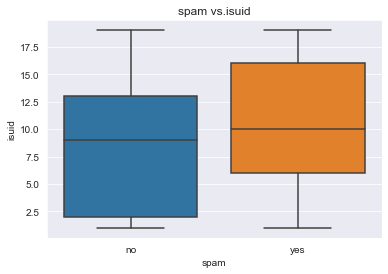





id 

count    2171.000000
mean      201.187471
std       640.335487
min         1.000000
25%        33.000000
50%        62.000000
75%       108.000000
max      3470.000000
Name: id, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


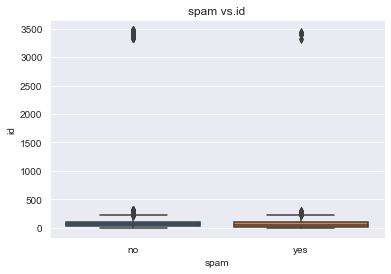





day of week 

Wed    0.212345
Thu    0.183326
Tue    0.165822
Mon    0.148319
Fri    0.145555
Sun    0.081990
Sat    0.062644
Name: day of week, dtype: float64


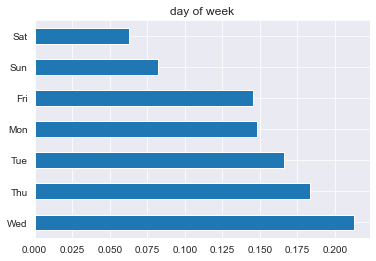

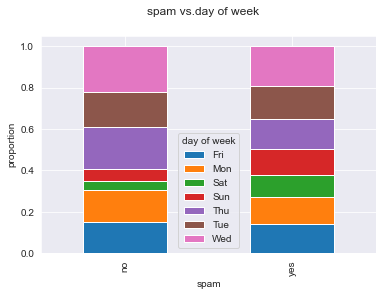





time of day 

count    2171.000000
mean       12.260709
std         5.651004
min         0.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        23.000000
Name: time of day, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


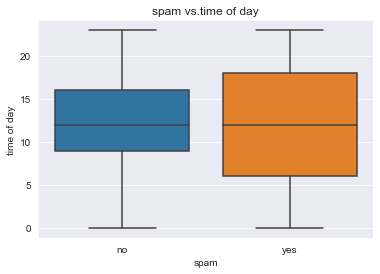





size.kb 

count    2171.000000
mean       16.489636
std        80.557683
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max      1337.000000
Name: size.kb, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


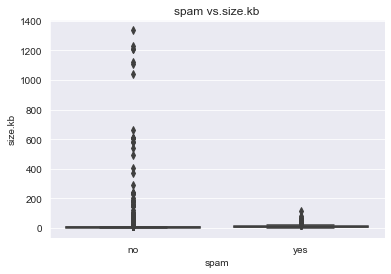





box 

yes    0.508982
no     0.491018
Name: box, dtype: float64


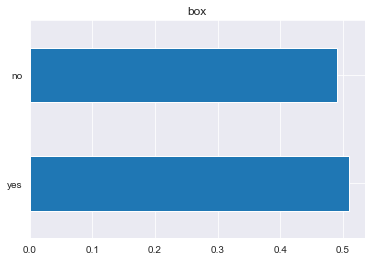

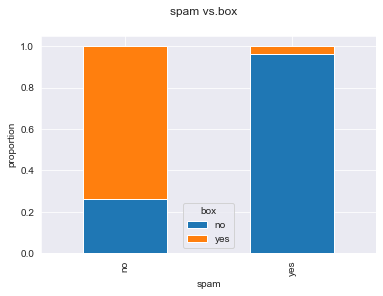





domain 

edu     0.477660
com     0.371718
net     0.054353
de      0.020728
uk      0.019346
org     0.011976
info    0.005988
gov     0.004606
ca      0.004146
cn      0.003685
us      0.003224
it      0.003224
fr      0.001842
ch      0.001382
pl      0.000921
nz      0.000921
at      0.000921
is      0.000921
ro      0.000921
cy      0.000461
hu      0.000461
hkd     0.000461
lt      0.000461
co      0.000461
kr      0.000461
tsp     0.000461
by      0.000461
tw      0.000461
hfc     0.000461
rdp     0.000461
c       0.000461
sk      0.000461
be      0.000461
lv      0.000461
se      0.000461
il      0.000461
bak     0.000461
kw      0.000461
my      0.000461
ph      0.000461
pt      0.000461
pin     0.000461
cz      0.000461
jp      0.000461
Name: domain, dtype: float64


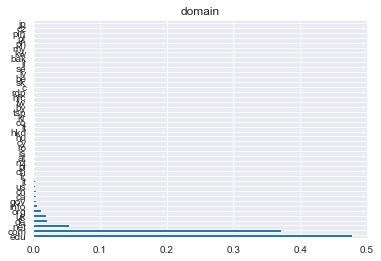

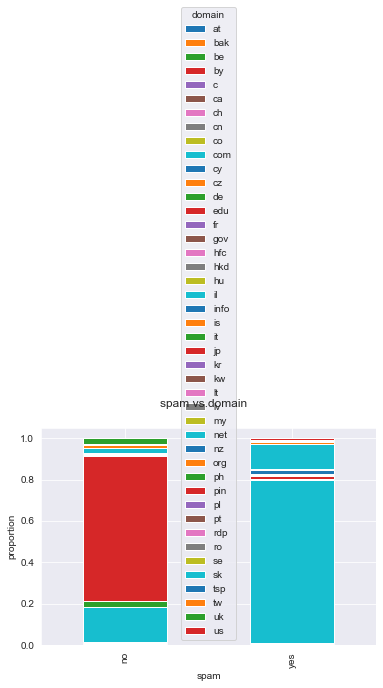





local 

no     0.562414
yes    0.437586
Name: local, dtype: float64


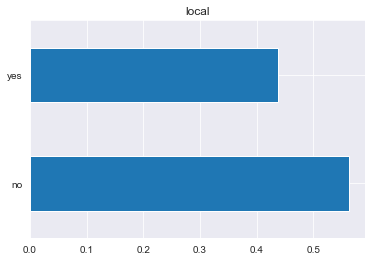

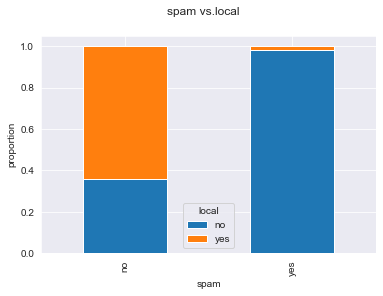





digits 

count    2171.000000
mean        0.590972
std         2.528618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: digits, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


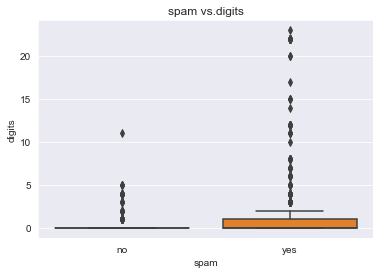





name 

name      0.742054
empty     0.135882
single    0.122064
Name: name, dtype: float64


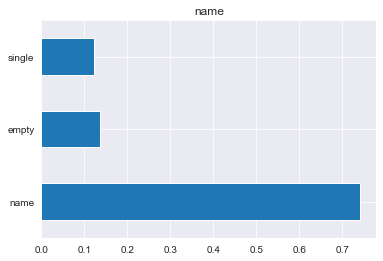

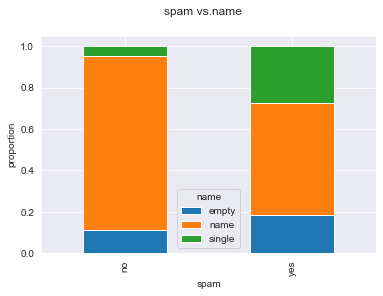





cappct 

count    2171.000000
mean        0.158434
std         0.168419
min         0.000000
25%         0.060000
50%         0.128000
75%         0.200000
max         1.000000
Name: cappct, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


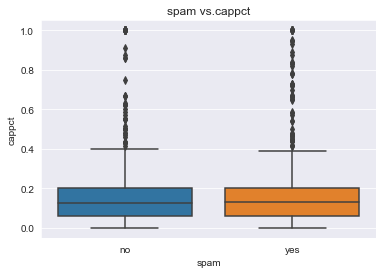





special 

count    2171.000000
mean        1.397052
std         2.323566
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        35.000000
Name: special, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


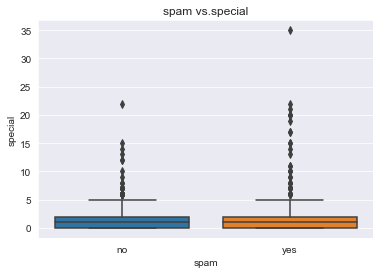





credit 

no     0.958544
yes    0.041456
Name: credit, dtype: float64


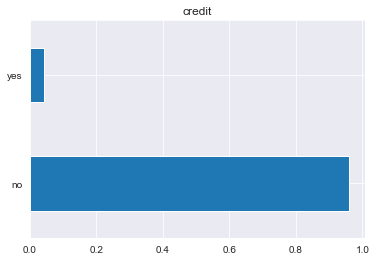

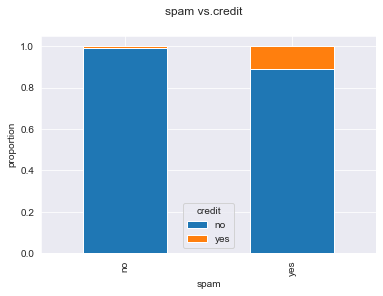





sucker 

no     0.895901
yes    0.104099
Name: sucker, dtype: float64


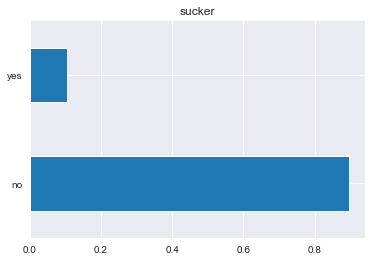

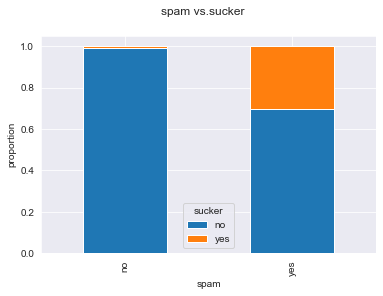





porn 

no     0.987563
yes    0.012437
Name: porn, dtype: float64


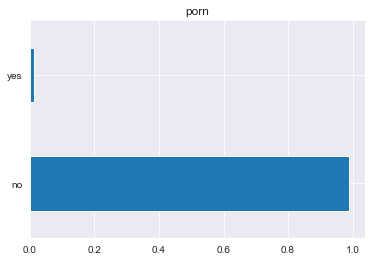

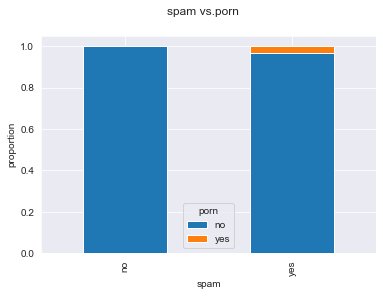





chain 

no     0.973284
yes    0.026716
Name: chain, dtype: float64


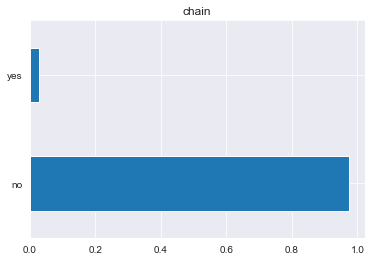

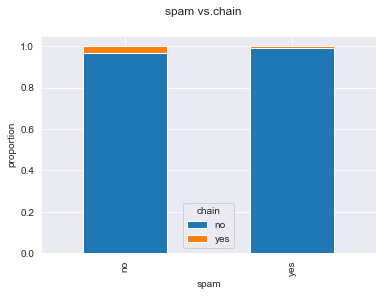





username 

no     0.958084
yes    0.041916
Name: username, dtype: float64


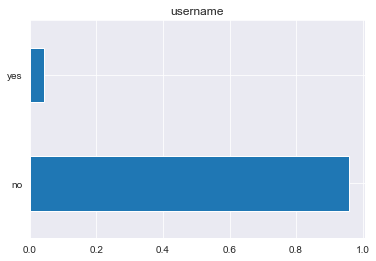

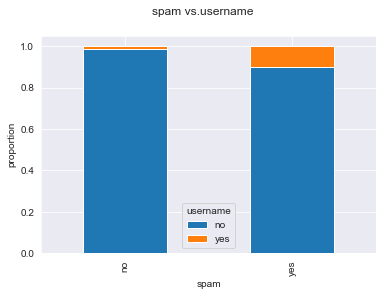





large text 

no     0.809765
yes    0.190235
Name: large text, dtype: float64


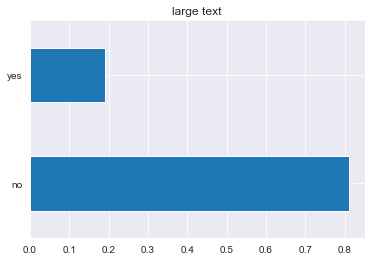

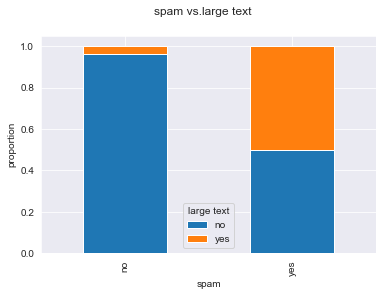





spampct 

count    818.000000
mean      44.634474
std       34.155733
min        0.000000
25%       11.000000
50%       47.500000
75%       76.000000
max       99.000000
Name: spampct, dtype: float64


C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


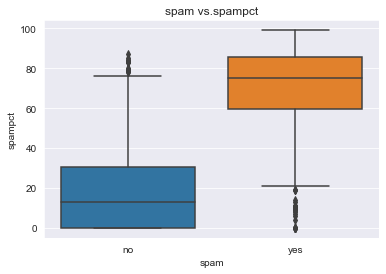





category 

ord     0.343620
list    0.317826
com     0.292492
news    0.046062
Name: category, dtype: float64


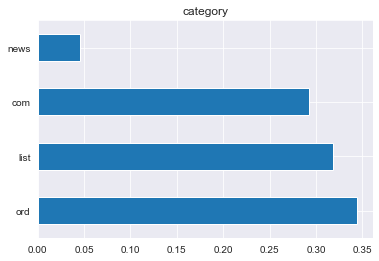

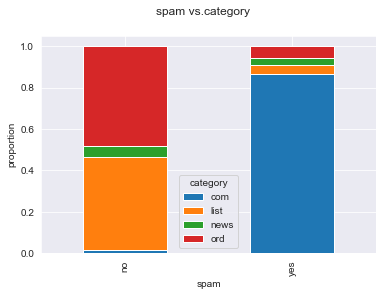





spam 

no     0.672962
yes    0.327038
Name: spam, dtype: float64


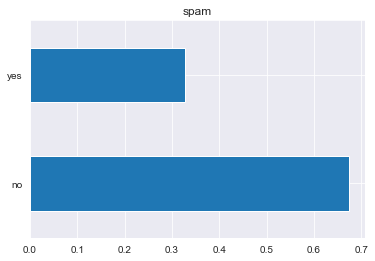

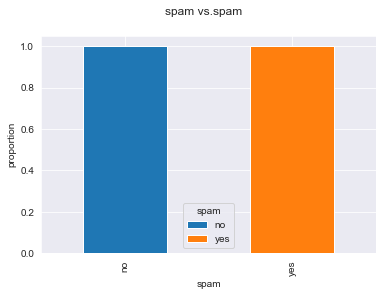

In [25]:
for variable in variable_list:
    print(variable,"\n")
    if len(set(data_spam[variable]))<=10 or type(data_spam[variable][1]) is str:
        print(data_spam[variable].value_counts(normalize=True))

        #plot the bar graph of percentage job categories
        plt.figure()
        data_spam[variable].value_counts(normalize=True).plot.barh()
        plt.title(variable)
        plt.show()
        
        counts_df = data_spam.groupby([variable,"spam"])["id"].count().unstack()
        percents_df = counts_df.div(counts_df.sum()).T
        
        fig, ax = plt.subplots()
        percents_df.plot(kind="bar", stacked=True, ax=ax)
        ax.legend(title=variable)
            
        
        ax.set_xlabel("spam")
        ax.set_ylabel('proportion')
        title="spam vs."+variable
        fig.suptitle(title)
        
        plt.show()
    else:
        print(data_spam[variable].describe())
        #sns.displot(data_spam[variable])
        plt.figure()

        sns.boxplot(data_spam['spam'],data_spam[variable])

        title='spam vs.'+variable

        plt.title(title)

        plt.show()
    print("\n\n\n")

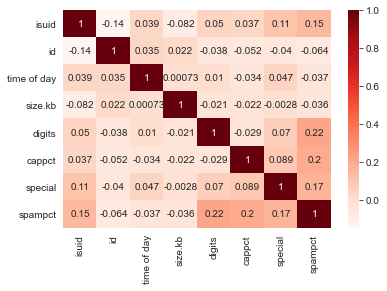

In [26]:
sns.heatmap(data_spam.corr(), annot=True, cmap = 'Reds')
plt.show()

### 2.3

#### (a)

In [27]:
data_spam.spampct.isnull().sum()

1353

#### (b)

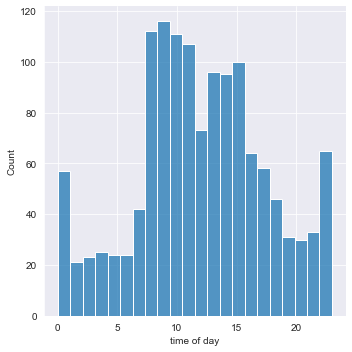

In [28]:
data_null=data_spam[data_spam['spampct'].isnull()]
sns.displot(data_null['time of day'])


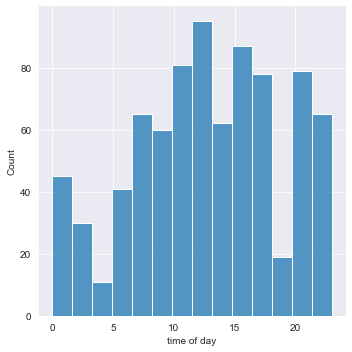

In [29]:
data_not_null=data_spam[data_spam['spampct'].notnull()]
sns.displot(data_not_null['time of day'])

#### （c）

there are more number of data that spampct is null, so the upper diagram has more partitions.But the distributions are very similar 

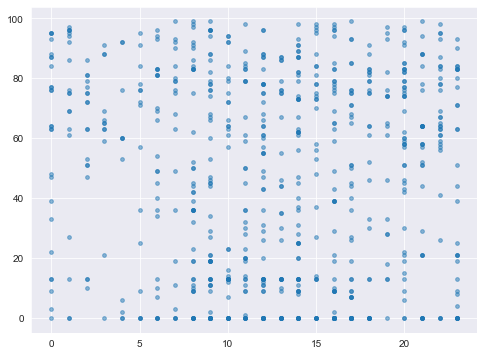

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(data_spam['time of day'],data_spam['spampct'],s=14, alpha=1/2)
plt.show()

In [31]:
len(data_not_null)

818

<p>the number of scatter is 818
<p>method to solve overlap:<br>
1:Enlarge the figsize, make the size of dot smaller<br>
2:Changing point transparency with property alpha,The more overlapping points, the darker the color


## 3  Exploring the Relationship Between Overfitting and Noise

### (a)

In [32]:
np.random.seed(1)
x=list(np.random.randn(100))


### (b)

In [33]:
eps=list(np.random.normal(loc=0,scale=0.5,size=(100)))


### (c)

In [34]:
y=[]
for i in range(100):
    yi=-1+0.5*x[i]+eps[i]
    y.append(yi)


according to above expression we could see:<br>${\beta}_0=-1$<br>
${\beta}_1=0.5$

### (d)

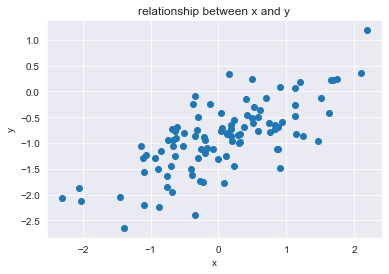

In [35]:
plt.figure
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('relationship between x and y')
plt.show()

<p> There is a obvious linear relationship between x and y, when x increase 1 y will increase about 0.5. x range from -3 to 3, y range from -3 to 1

### (e)

In [36]:
data={"x":x,"y":y}
df=pd.DataFrame(data)
fitted_result = sm.OLS.from_formula('y ~ x', df).fit()
fitted_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.20e-17
Time:                        23:10:37   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x              0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
fitted_result.params

Intercept   -0.926493
x            0.547714
dtype: float64

$\hat{\beta}_0=-1.0035,\hat{\beta}_1=0.4736$<br>
even though $\hat{\beta}_0, \hat{\beta}_1$ are not exactly qual to ${\beta}_0, {\beta}_1$, they are quite close<br>
$\hat{\beta}_0,\hat{\beta}_1$is a little smaller than ${\beta}_0,{\beta}_1$

### (f)

C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


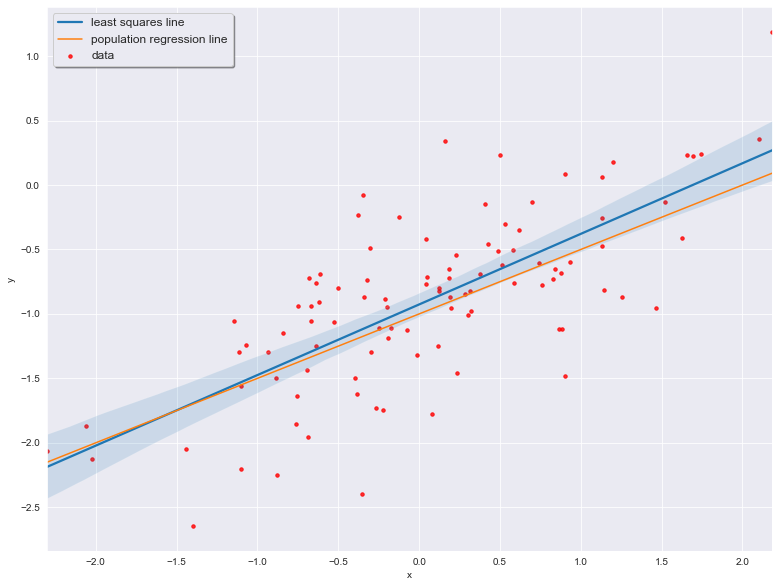

In [38]:
fig,ax=plt.subplots(figsize=(13,10))
sns.regplot(df.x, df.y, scatter_kws={'color':'r', 's':12}, label="data",line_kws={'label':"least squares line"})
plt.plot(sorted(x),[-1+0.5*xi for xi in sorted(x)],label="population regression line")
legend=ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

### (g)

In [39]:
fitted_result2 = sm.OLS.from_formula('y ~ x+np.square(x)', df).fit()
fitted_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.83e-16
Time:                        23:10:38   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x                0.5468      0.053     10.229      0.000       0.441       0.653
np.square(x)     0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>In my opinion, there is no improvement.<br> Firstly, ${R}^2$ does not improve;<br> Secondly, the residuals does not decrease significently; <br>Thirdly, the P-value of $np.square(x)$ is $0.337>0.05$, meaning $np.square(x)$ is not appropriate

### (h)

In [40]:
eps_less=list(np.random.normal(loc=0,scale=0.1,size=(100)))
y_less=[]
for i in range(100):
    yi=-1+0.5*x[i]+eps_less[i]
    y_less.append(yi)
df['y_less']=y_less
fitted_result_less=sm.OLS.from_formula('y_less~x',df).fit()
fitted_result_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_less   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1872.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.14e-65
Time:                        23:10:38   Log-Likelihood:                 87.938
No. Observations:                 100   AIC:                            -171.9
Df Residuals:                      98   BIC:                            -166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9988      0.010    -98.222      0.000      -1.019      -0.979
x              0.4959      0.011     43.268      0.000       0.473       0.519
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.398
Skew:                           0.107   Prob(JB):                        0.820
Kurtosis:                       2.776   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
fitted_result_less.params

Intercept   -0.998769
x            0.495894
dtype: float64

C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


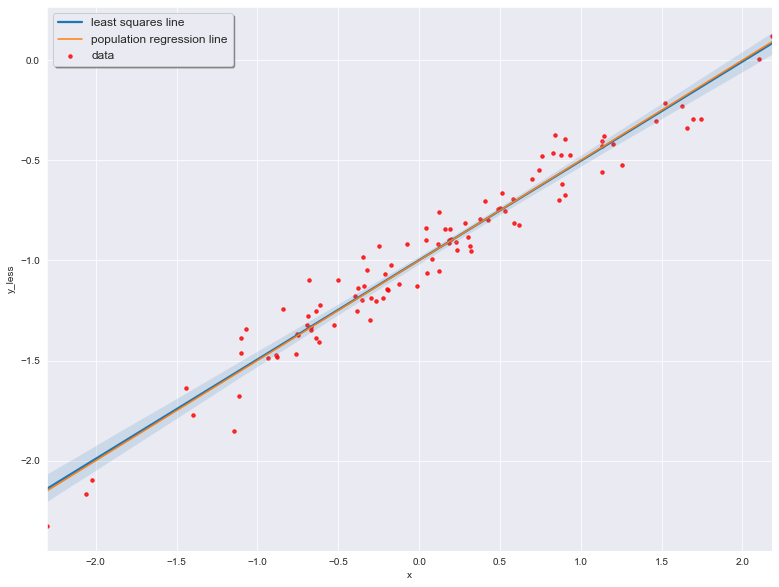

In [42]:
fig,ax=plt.subplots(figsize=(13,10))

sns.regplot(df.x, df.y_less, scatter_kws={'color':'r', 's':12}, label="data",line_kws={'label':"least squares line"})
plt.plot(sorted(x),[-1+0.5*xi for xi in sorted(x)],label='population regression line')
legend=ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

The points are closer to each other, the RSE is lower, R2 and F-statistic are much higher than with variance of 0.25. The linear regression and population lines are very close to each other as noise is reduced, and the relationship is much more linear.

### (i)

In [43]:
eps_more=list(np.random.normal(loc=0,scale=0.7,size=(100)))
y_more=[]
for i in range(100):
    yi=-1+0.5*x[i]+eps_more[i]
    y_more.append(yi)
df['y_more']=y_more
fitted_result_more=sm.OLS.from_formula('y_more~x',df).fit()
fitted_result_more.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_more   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.30
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.22e-06
Time:                        23:10:39   Log-Likelihood:                -112.08
No. Observations:                 100   AIC:                             228.2
Df Residuals:                      98   BIC:                             233.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0098      0.075    -13.437      0.000      -1.159      -0.861
x              0.4260      0.085      5.030      0.000       0.258       0.594
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.286
Skew:                           0.080   Prob(JB):                        0.867
Kurtosis:                       3.207   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
fitted_result_more.params

Intercept   -1.009773
x            0.426043
dtype: float64

C:\Users\LEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


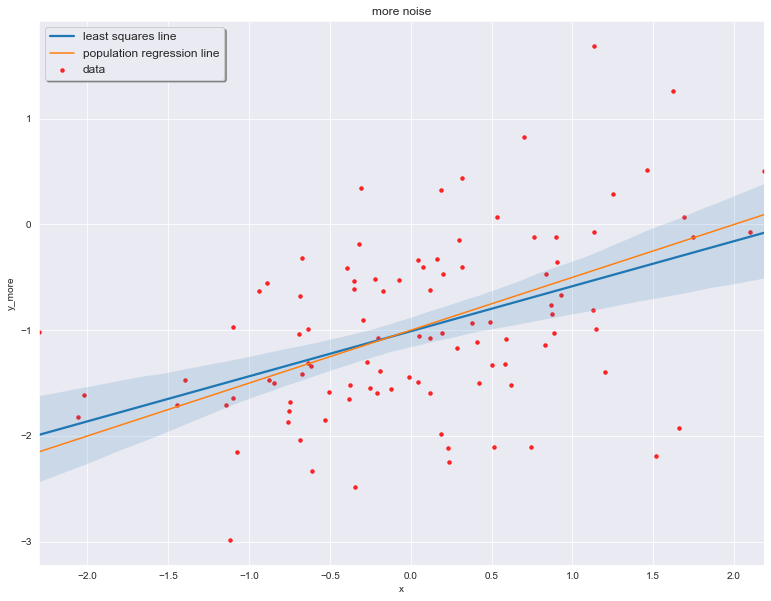

In [45]:
fig,ax=plt.subplots(figsize=(13,10))
sns.regplot(df.x, df.y_more, scatter_kws={'color':'r', 's':12}, label="data",line_kws={'label':"least squares line"})
plt.plot(sorted(x),[-1+0.5*xi for xi in sorted(x)],label='population regression line')
legend=ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.title('more noise')
plt.show()

### (j)

The points are more spread out and so the relationship is less linear. The RSE is higher, the R2 and F-statistic are lower than with variance of 0.25

In [46]:
fitted_result.conf_int()

,0,1
Intercept,-1.019741,-0.833246
x,0.442613,0.652814


In [47]:
a=round(fitted_result.conf_int()[0][0],5)
b=round(fitted_result.conf_int()[0][1],5)
c=round(fitted_result.conf_int()[1][0],5)
d=round(fitted_result.conf_int()[1][1],5)
print(f'(1)original data set: \nconfidence interval for beta0 is[{a},{b}] \nconfidence interval for beta1 is[{c},{d}]')

(1)original data set: 
confidence interval for beta0 is[-1.01974,0.44261] 
confidence interval for beta1 is[-0.83325,0.65281]


In [48]:
fitted_result_less.conf_int()

,0,1
Intercept,-1.018948,-0.978590
x,0.473150,0.518638


In [49]:
a_less=round(fitted_result_less.conf_int()[0][0],5)
b_less=round(fitted_result_less.conf_int()[0][1],5)
c_less=round(fitted_result_less.conf_int()[1][0],5)
d_less=round(fitted_result_less.conf_int()[1][1],5)
print(f'(2)less noisey data set: \nconfidence interval for beta0 is[{a_less},{b_less}] \nconfidence interval for beta1 is[{c_less},{d_less}]')

(2)less noisey data set: 
confidence interval for beta0 is[-1.01895,0.47315] 
confidence interval for beta1 is[-0.97859,0.51864]


In [50]:
fitted_result_more.conf_int()

,0,1
Intercept,-1.158905,-0.860641
x,0.257955,0.594131


In [51]:
a_more=round(fitted_result_more.conf_int()[0][0],5)
b_more=round(fitted_result_more.conf_int()[0][1],5)
c_more=round(fitted_result_more.conf_int()[1][0],5)
d_more=round(fitted_result_more.conf_int()[1][1],5)
print(f'(3)noiser data set: \nconfidence interval for beta0 is[{a_more},{b_more}] \nconfidence interval for beta1 is[{c_more},{d_more}]')

(3)noiser data set: 
confidence interval for beta0 is[-1.15891,0.25796] 
confidence interval for beta1 is[-0.86064,0.59413]


<b>In conclusion:less noise lead to shorter confidence interval

## 4 Naive Bayes and Spam Filtering

### 4.1

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

In [53]:
data_naive=pd.read_csv('spam.csv')
imp = SimpleImputer(strategy="most_frequent")
data_naive=pd.DataFrame(imp.fit_transform(data_naive),columns=data_naive.columns.values.tolist())
#impute missing vallue
#or drop this feature:data_naive=data_naive.loc[:,~data_naive.columns.isin(['spampct'])]
for variable in data_naive.columns.values.tolist():
    dict_={}
    if type(data_naive[variable][0]) is str:
        for num,string in enumerate(set(data_naive[variable])):
            dict_[string]=num
        for i in range(len(data_naive[variable])):
            
            temp=int(dict_[data_naive[variable][i]])
            data_naive.loc[i,variable]=temp
data_naive=data_naive.astype(float)
#print(data_naive.head())


In [54]:
X_train, X_test, y_train, y_test = train_test_split(data_naive.loc[:,~data_naive.columns.isin(['spam'])].values, data_naive.iloc[:,-1].values, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test_num=X_test.shape[0]
false_num=(y_test != y_pred).sum()
test_error=false_num/test_num
print(f"Number of mislabeled points out of a total {test_num} points:{false_num}.test error is {test_error*100}%" )


Number of mislabeled points out of a total 435 points:26.test error is 5.977011494252873%


### 4.2

In [55]:
error_list=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_naive.loc[:,~data_naive.columns.isin(['spam'])].values, data_naive.iloc[:,-1].values, test_size=0.2)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    test_num=X_test.shape[0]
    false_num=(y_test != y_pred).sum()
    test_error=false_num/test_num
    print(f"Number of mislabeled points out of a total {test_num} points:{false_num}.test error is {test_error*100}%" )

    error_list.append(test_error)

Number of mislabeled points out of a total 435 points:28.test error is 6.436781609195402%
Number of mislabeled points out of a total 435 points:25.test error is 5.747126436781609%
Number of mislabeled points out of a total 435 points:29.test error is 6.666666666666667%
Number of mislabeled points out of a total 435 points:22.test error is 5.057471264367816%
Number of mislabeled points out of a total 435 points:26.test error is 5.977011494252873%
Number of mislabeled points out of a total 435 points:27.test error is 6.206896551724138%
Number of mislabeled points out of a total 435 points:30.test error is 6.896551724137931%
Number of mislabeled points out of a total 435 points:25.test error is 5.747126436781609%
Number of mislabeled points out of a total 435 points:27.test error is 6.206896551724138%
Number of mislabeled points out of a total 435 points:31.test error is 7.126436781609195%


In [56]:
error_var=np.var(error_list)
print(f"The variability of test error is {error_var}")

The variability of test error is 3.382216937508257e-05


<p>The var of test error is relatively small, naive bayes method is relatively stable

###  4.3

<p>There are two types of error <i>variance</i> and <i>bias</i>
<p><i>Variance</i> refers to the amount by which f would change if we estimated it using a different training data set.Since the training data are used to fit the statistical learning method, different training data sets
will result in a different $\hat{f}$.<br><i>Bias</i> refers to the error that is introduced by approximating a real-life problem
<P>Non-parametric approach incurs a cost in variance that is not offset by a reduction in bias. However, according to the assumption, Naive Bayes assumption introduces some bias, but reduces variance, so we can not use naive bayes to reflect it.

## 5 Least Squares Linear Regression is MLE for Gaussian noise

$\hat{f}_{\beta}(X)=\hat{\beta}_0*x_0+\hat{\beta}_1*x_1+...+\hat{\beta}_p*x_n$ $(x_0=1)$ <br>
$\hat{f}_{\beta}(X)=\sum_{i=0}^{p}\hat{\beta}_i*x_i$<br>
$\hat{f}_{\beta}(X)={\beta}^{T}X$
<p><b>Least Squares Linear Regression:</b><br>
    $\displaystyle{\min_{\beta}\sum_{j=1}^{n}(f(X_j)-{\beta}^{T}X_j)^2}$
    <br>j: the order of training obervations 
<p><b>MLE:</b><br>
    $f(x)={\beta}^{T}X+\varepsilon$<br>
    since the distribution of noise is guassion<br>
    $P(\varepsilon)=\frac{1}{\sqrt{2\pi{\sigma}^2}}e^{-\frac{{\varepsilon}^2}{2{\sigma}^2}}$<br>
    $P(f(x)|x;\varepsilon)=\frac{1}{\sqrt{2\pi{\sigma}^2}}e^{-\frac{(f(X)-{\beta}^{T}X)^2}{2{\sigma}^2}}$<br>
    $L({\beta})=\displaystyle{\prod_{j=1}^{n}P(f(X_j)|X_j;\varepsilon)}$<br>
    $\displaystyle{\max_{\beta}\prod_{j=1}^{n}P(f(X_j)|X_j;\varepsilon)}$<br>
    $\displaystyle{\max_{\beta}\prod_{j=1}^{n}\frac{1}{\sqrt{2\pi{\sigma}^2}}e^{-\frac{(f(X_j)-{\beta}^{T}X_j)^2}{2{\sigma}^2}}}$<br>
    <p>Taking logarithm on both sides, the log-likelihood function is as follow:<br>
    $\displaystyle{\max_{\beta}\log L({\beta})}=\log\displaystyle{\max_{\beta}\prod_{j=1}^{n}\frac{1}{\sqrt{2\pi{\sigma}^2}}e^{-\frac{(f(X_j)-{\beta}^{T}X_j)^2}{2{\sigma}^2}}}$<br>
    $\displaystyle{\max_{\beta}\log L({\beta})}=\displaystyle{\max_{\beta}\sum_{j=1}^{n}\log\frac{1}{\sqrt{2\pi{\sigma}^2}}e^{-\frac{(f(X_j)-{\beta}^{T}X_j)^2}{2{\sigma}^2}}}$<br>
    $\displaystyle{\max_{\beta}\log L({\beta})}=\displaystyle{\max_{\beta}\sum_{j=1}^{n}\log\frac{1}{\sqrt{2\pi{\sigma}^2}}-\frac{(f(X_j)-{\beta}^{T}X_j)^2}{2{\sigma}^2}}$<br>
    $\displaystyle{\max_{\beta}\log L({\beta})}=\displaystyle{\max_{\beta}n\log\frac{1}{\sqrt{2\pi{\sigma}^2}}-\frac{1}{2{\sigma}^2}\sum_{j=1}^{n}(f(X_j)-{\beta}^{T}X_j)^2}$<br>
    $\displaystyle{\max_{\beta}\log L({\beta})}=\displaystyle{n\log\frac{1}{\sqrt{2\pi{\sigma}^2}}-\frac{1}{2{\sigma}^2}\underbrace{\min_{\beta}\sum_{j=1}^{n}(f(X_j)-{\beta}^{T}X_j)^2}_{Least Squares Linear Regression}}$
        <p>According to above expression, maximizing the likelihood function  is same as minimizing square
            

## 6  k Nearest Neighbors and the Curse of Dimensionality

### (a)

Since it is a uniform distribution, intervals that have same length have equally probablility. Then intervals: $[x-0.05, x+0.05]$, so $length=0.1$ (Assuming $x\in[0.05, 0.95]$). Therefore, on average 10% of the observations would be available to make a prediction for the test observation.

### (b)

Since the avaible observations need to satisfy two intervals at the same time. ${X}_{1length} \times {X}_{2length} = 0.01$(Assuming $x\in[0.05, 0.95]$). Therefore, 1% of the available observations would be used to make a prediction.

### (c)

When p=100; $0.1^p = 0.1^{100}$ . Therefore  $0.1^{100}$ of the observations are available.

### (d)

As the number of predictors increase, the fraction of observations available to make a prediction is reduced exponentially.

### (e)

When $p=1 ; d(length) = 0.1^{1/1} = 0.1$<br>
When $p=2 ; d(length) = 0.1^{1/2} = 0.32$<br>
When $p=100 ; d(length) = 0.1^{1/100} = 0.977$<br>
  
Assuming the  the length of each side of the hypercube is $l$, when $p=i$, we need to make sure $l^i=0.1$, so $l=0.1^{1/i}$ <br>Therefore the length of each side of hypercube will increase as the increase of p
 